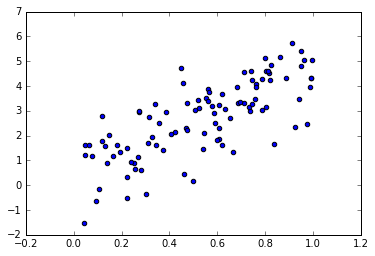

In [1]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
%matplotlib inline

#Create 1d data from normal dist
x = npr.rand(100)
#f(x) = 5x + noise
y = (x * 5) + npr.randn(100)
#plot
plt.scatter(x, y)


In [2]:
from sklearn.cluster import KMeans

#Find centers, arbitrary number of centres
centres = KMeans(n_clusters=3).fit(x.reshape(-1, 1)).cluster_centers_

#Calculate Distance Between two vectors
def euclidean(a, b):
    return np.linalg.norm(a - b)

#Gaussian distance
def gaussian(a, b, sigma):
    return np.exp( - (euclidean(a, b) ** 2) / 2 * sigma ** 2 )
#Calculates distance between many points
def Calculate_Phi(X, centres):
    phi = np.zeros([len(X), len(centres)])
    for i, xi in enumerate(X):
        for j, centre in enumerate(centres):
            phi[i, j] = gaussian(xi, centre, 0.1)
    return phi

#calculate distance matrix, find pseudo inverse
phi = Calculate_Phi(x, centres)
phi_i = np.linalg.pinv(phi)
#calculate weights
w = np.matmul(phi_i, y)

def predict(x, centres, w):    
    phi_x = [gaussian(x, centre, 0.1) for centre in centres]
    return np.dot(phi_x, w)

def predict_all(X, centres, w):
    return [predict(xi, centres, w) for xi in X]

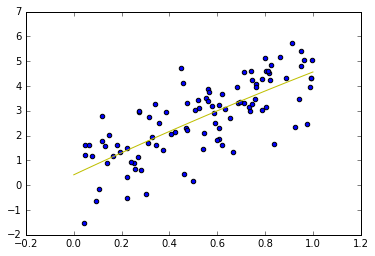

In [3]:
#plot regression line
xx = np.arange(0, 1.01, 0.01)
yy = predict_all(xx, centres, w)
plt.scatter(x, y)
plt.plot(xx, yy, 'y')